# Module 10: Data Formats, Transformation and Preprocessing

## Lecture 2: Further Data Preprocessing

CSCI 1360: Foundations for Informatics and Analytics

## Overview and Objectives

In this lecture we will learn the patterns of missing values instances in datasets and types of solutions to tackle this problem. By the end of this lecture you should be able:

* Distinguish between patterns of missing values instances in a dataset.

* Select the proper imputation strategy for the missed values in a dataset.

* Know techniquies to handle imbalanced data.

* Understand the advantages of Dimensionality Reduction.



### Part A: Imputation of missing values

* Many real world datasets contain missing values for various reasons.

* A pattern of the missing values could help in determining the best strategy to handle that.

* Missing values could be focused in a single or multiple columns. A signle row or multiple ones could have missing values also.
    

* Discarding rows or columns from a dataset due to the missing values leads to losing data.

* Constant values or values from similar data could be used to impute missed values.

**Column/Feature Missed values**

In [12]:
import pandas as pd

df = pd.read_csv('files/accidents_col.csv')

df.head(10)

,CASENUM,VE_FORMS,VEH_NO,PER_NO,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,...,P_SF3,LOCATION,SEX_IM,INJSEV_IM,EJECT_IM,PERALCH_IM,SEAT_IM,AGE_IM,PSUSTRAT,WEIGHT
0,201800381338,4,1,1,4,56,208,208,1,9.0,...,0,0,1,0,0,0,11,48,20,187.193308
1,201800381338,4,2,1,4,56,208,208,1,9.0,...,0,0,2,0,0,0,11,43,20,187.193308
2,201800381338,4,3,1,4,56,208,208,1,NaN,...,0,0,1,0,0,0,11,37,20,187.193308
3,201800381338,4,4,1,4,56,208,208,1,9.0,...,0,0,1,0,0,0,11,67,20,187.193308
4,201800381366,3,1,1,4,56,214,214,1,7.0,...,0,0,2,1,0,0,11,32,20,149.787336
5,201800381366,3,2,1,4,56,214,214,1,7.0,...,0,0,2,0,0,0,11,46,20,149.787336
6,201800381366,3,3,1,4,56,214,214,1,NaN,...,0,0,1,0,0,0,11,52,20,149.787336
7,201800381374,2,1,1,4,56,214,214,1,NaN,...,0,0,1,1,0,0,11,34,20,76.421258
8,201800381374,2,1,2,4,56,214,214,1,6.0,...,0,0,1,0,0,0,13,24,20,76.421258
9,201800381374,2,2,1,4,56,214,214,1,6.0,...,0,0,1,1,0,0,11,31,20,76.421258


**Row Missed Values**

In [13]:
import pandas as pd

df = pd.read_csv('files/accidents_row.csv')

df.head(5)

,CASENUM,VE_FORMS,VEH_NO,PER_NO,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,...,P_SF3,LOCATION,SEX_IM,INJSEV_IM,EJECT_IM,PERALCH_IM,SEAT_IM,AGE_IM,PSUSTRAT,WEIGHT
0,201800381338,4.0,1,1,4.0,56,208,208.0,1.0,9.0,...,0,0,1,0,0,0,11,48,20,187.193308
1,201800381338,NaN,2,1,NaN,56,208,NaN,NaN,9.0,...,0,0,2,0,0,0,11,43,20,187.193308
2,201800381338,4.0,3,1,4.0,56,208,208.0,1.0,NaN,...,0,0,1,0,0,0,11,37,20,187.193308
3,201800381338,4.0,4,1,4.0,56,208,208.0,1.0,9.0,...,0,0,1,0,0,0,11,67,20,187.193308
4,201800381366,3.0,1,1,4.0,56,214,214.0,1.0,7.0,...,0,0,2,1,0,0,11,32,20,149.787336


#### Univariate feature imputation

Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent-Mode ) of each column in which the missing values are located.

In [1]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2],[1, 3], [4, 2], [7, 6]])

X = [[np.nan, 2], [6, np.nan], [7, np.nan]]
print(imp.transform(X))

[[3.25 2.  ]
 [6.   3.25]
 [7.   3.25]]


#### Multivariate feature imputation

This algorithm learns a function from data observation and use it to estimate the values for missing ones.

* `IterativeImputer` in scikit-learn is still experimental.

In [15]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])

X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


**Nearest neighbors imputation**

Using [k-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) algorithm, the `KNNImputer` class in scikit-learn can fill missing values.

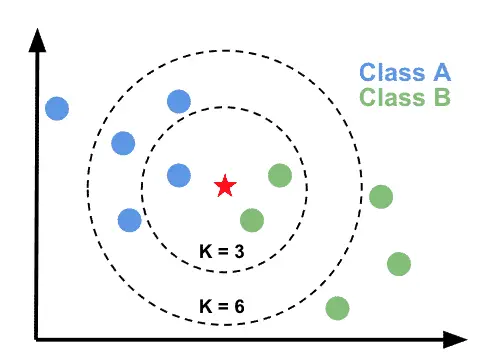

_Image credit: jcchouinard.com_

In [16]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
X = [[1, 2, nan], 
     [3, 4, 3],
     [nan, 6, 5],
     [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

#### Imbalanced Data

Depending on the objective of the data analysis task, it could be critical that your work detect samples with minority labels. To guarantee that minor labels get noticed you can follow the following stratigies:

* Downsampling
* Oversampling
* Assign weights to labels

#### Dimensionality Reduction

Dimnesionality reduction is helpful in handling datasets with big number of features, it is beneficial in facilitating data visualization and having less computation when processing the data.

## Review Questions

Some questions to discuss and consider:

* Given that there are missing values in a dataset. However, missing values are not focused on specific columns. What is your imputation strategy to handle this scenario?

* What are the aspects of have a large K value in the K-nearest neighbor approach?

## Additional Resources

 1. Roderick J A Little and Donald B Rubin (1986). “Statistical Analysis with Missing Data”. John Wiley & Sons, Inc., New York, NY, USA.
 
 2. scikit learn, Preprocessing data, https://scikit-learn.org/stable/modules/preprocessing.html
 
 3. Grus, Joel. *Data Science from Scratch*. 2015. ISBN-13: 978-1491901427